### Using Pytorch to realize ScatterNet, based on python3
Now only main function are supported

### import data

In [3]:
from scatter_net_core import *
data = 'data/8_layer_tio2'
percent_val = .2
train_X, train_Y , test_X, test_Y, val_X, val_Y , x_mean, x_std = get_data(data,percentTest=percent_val)

In [78]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.nn import Linear, Module, MSELoss
from torch.utils.data import TensorDataset, Dataset, DataLoader
import numpy as np
from torch.autograd import Variable

BATCH_SIZE = 200
EPOCHS = 5000 
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")


x_data = torch.from_numpy(train_X)
y_data = torch.from_numpy(train_Y)



deal_dataset = TensorDataset(x_data, y_data)
train_loader = DataLoader(dataset = deal_dataset,
                         batch_size = BATCH_SIZE,
                         shuffle = True,
                         num_workers = 0)


#Network
class MLP(nn.Module):
    def __init__(self):
        super(MLP,self).__init__()
        self.fc1 = nn.Linear(8,500)
        torch.nn.init.normal_(self.fc1.weight, mean=0, std=.1)
        torch.nn.init.normal_(self.fc1.bias, mean=0, std=.1)
        self.fc2 = nn.Linear(500,500)
        torch.nn.init.normal_(self.fc1.weight, mean=0, std=.1)
        torch.nn.init.normal_(self.fc1.bias, mean=0, std=.1)
        self.fc3 = nn.Linear(500,500)
        torch.nn.init.normal_(self.fc1.weight, mean=0, std=.1)
        torch.nn.init.normal_(self.fc1.bias, mean=0, std=.1)
        self.fc4 = nn.Linear(500,500)
        torch.nn.init.normal_(self.fc1.weight, mean=0, std=.1)
        torch.nn.init.normal_(self.fc1.bias, mean=0, std=.1)
        self.fc5 = nn.Linear(500,200)
        torch.nn.init.normal_(self.fc1.weight, mean=0, std=.1)
        torch.nn.init.normal_(self.fc1.bias, mean=0, std=.1)

    def forward(self,din):
        din = din.view(-1,8)
        din = F.dropout(self.fc1(din), p = 0.1)
        dout = F.relu(din)
        dout = F.relu(self.fc2(dout))
        dout = F.relu(self.fc3(dout))
        dout = F.relu(self.fc4(dout))
        dout = self.fc5(dout)
        return dout

model = MLP().to(DEVICE)

criterion = MSELoss()
#optimizer = optim.Adam(model.parameters(), lr = 0.001, weight_decay=.99)
optimizer = optim.RMSprop(model.parameters(), lr = 0.001, alpha=0.99)

def train(model, device, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (inputs, labels) in enumerate(train_loader,0):
        inputs, labels = inputs.to(device), labels.to(device)
        inputs, labels = Variable(inputs),Variable(labels)
        optimizer.zero_grad()
        outputs = model(inputs.float())
        loss = criterion(outputs, labels.float())
        loss.backward()
        optimizer.step()
    if (epoch%10==0):
        print('epoch {}, loss {:1.4f}'.format(epoch,loss.item()))
#Training
for epoch in range(1, EPOCHS + 1):
    train(model, DEVICE, train_loader, optimizer, epoch)


torch.save(model, 'model.pth')

epoch 10, loss 0.0473
epoch 20, loss 0.0250
epoch 30, loss 0.0197
epoch 40, loss 0.0166
epoch 50, loss 0.0157
epoch 60, loss 0.0113
epoch 70, loss 0.0139
epoch 80, loss 0.0144
epoch 90, loss 0.0162
epoch 100, loss 0.0116
epoch 110, loss 0.0104
epoch 120, loss 0.0098
epoch 130, loss 0.0092
epoch 140, loss 0.0109
epoch 150, loss 0.0102
epoch 160, loss 0.0091
epoch 170, loss 0.0116
epoch 180, loss 0.0115
epoch 190, loss 0.0102
epoch 200, loss 0.0084
epoch 210, loss 0.0081
epoch 220, loss 0.0099
epoch 230, loss 0.0096
epoch 240, loss 0.0081
epoch 250, loss 0.0073
epoch 260, loss 0.0084
epoch 270, loss 0.0129
epoch 280, loss 0.0074
epoch 290, loss 0.0084
epoch 300, loss 0.0073
epoch 310, loss 0.0074
epoch 320, loss 0.0095
epoch 330, loss 0.0071
epoch 340, loss 0.0069
epoch 350, loss 0.0090
epoch 360, loss 0.0065
epoch 370, loss 0.0075
epoch 380, loss 0.0069
epoch 390, loss 0.0073
epoch 400, loss 0.0070
epoch 410, loss 0.0076
epoch 420, loss 0.0072
epoch 430, loss 0.0070
epoch 440, loss 0.00

epoch 3470, loss 0.0039
epoch 3480, loss 0.0049
epoch 3490, loss 0.0039
epoch 3500, loss 0.0041
epoch 3510, loss 0.0039
epoch 3520, loss 0.0045
epoch 3530, loss 0.0044
epoch 3540, loss 0.0040
epoch 3550, loss 0.0047
epoch 3560, loss 0.0038
epoch 3570, loss 0.0041
epoch 3580, loss 0.0041
epoch 3590, loss 0.0046
epoch 3600, loss 0.0038
epoch 3610, loss 0.0039
epoch 3620, loss 0.0042
epoch 3630, loss 0.0039
epoch 3640, loss 0.0039
epoch 3650, loss 0.0041
epoch 3660, loss 0.0045
epoch 3670, loss 0.0040
epoch 3680, loss 0.0045
epoch 3690, loss 0.0045
epoch 3700, loss 0.0042
epoch 3710, loss 0.0038
epoch 3720, loss 0.0042
epoch 3730, loss 0.0044
epoch 3740, loss 0.0039
epoch 3750, loss 0.0043
epoch 3760, loss 0.0040
epoch 3770, loss 0.0039
epoch 3780, loss 0.0039
epoch 3790, loss 0.0038
epoch 3800, loss 0.0040
epoch 3810, loss 0.0039
epoch 3820, loss 0.0040
epoch 3830, loss 0.0039
epoch 3840, loss 0.0043
epoch 3850, loss 0.0040
epoch 3860, loss 0.0041
epoch 3870, loss 0.0041
epoch 3880, loss

/home/kabu/.local/lib/python3.6/site-packages/torch/serialization.py:256: UserWarning: Couldn't retrieve source code for container of type MLP. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


### test

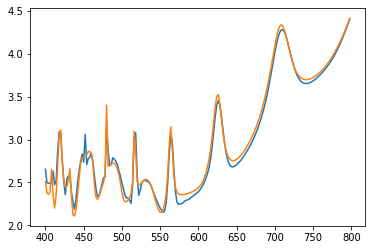

In [79]:
import matplotlib.pyplot as plt
N = 2000
test = model(x_data[N].float()).detach().numpy()[0]
plt.plot(range(400,800,2),test,range(400,800,2),train_Y[N])